# Mount

In [76]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except ImportError:
  print('Not on google drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [78]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import os
import matplotlib.image as mpimg

In [79]:
!wget https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py

--2023-11-13 10:55:32--  https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11818 (12K) [text/plain]
Saving to: ‘helper_functions.py.13’

helper_functions.py 100%[===================>]  11.54K  --.-KB/s    in 0.002s  

2023-11-13 10:55:32 (7.13 MB/s) - ‘helper_functions.py.13’ saved [11818/11818]



In [80]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

# Import Data

In [81]:
cd /content/drive/MyDrive/driven-data-animals-classification

/content/drive/MyDrive/driven-data-animals-classification


# Download the data

Go to competition dir

In [82]:
ls

competition_VfIpjyh/  competition_VfIpjyh.zip  __MACOSX/


In [83]:
# unzip_data('competition_VfIpjyh.zip')

In [84]:
cd competition_VfIpjyh

/content/drive/MyDrive/driven-data-animals-classification/competition_VfIpjyh


In [85]:
ls

5_perc/                                           helper_functions.py.2
benchmark.ipynb                                   helper_functions.py.3
best_model_09-11-2023_17-55.pth                   helper_functions.py.4
best_model_11-11-2023_02-29.pth                   helper_functions.py.5
best_model_11-11-2023_05-06.pth                   helper_functions.py.6
best_model_11-11-2023_05-39.pth                   helper_functions.py.7
best_model_11-11-2023_06-14.pth                   helper_functions.py.8
best_model_11-11-2023_06-24.pth                   helper_functions.py.9
best_model_11-11-2023_07-19.pth                   model_100_epochs.pth
best_model_11-11-2023_10-21.pth                   model_5%.pth
best_model_11-11-2023_21-55.pth                   perc_5/
best_model_11-11-2023_22-26.pth                   submission_df_08-11-2023_18-33.csv
best_model_11-11-2023_23-47.pth                   submission_df_09-11-2023_17-55.csv
best_model_12-11-2023_00-45.pth                   submission_d

In [86]:
master_dir = '/content/drive/MyDrive/driven-data-animals-classification/competition_VfIpjyh'

# Explore the data

In [87]:
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')
train_labels = pd.read_csv('train_labels.csv')

## Train_features

In [88]:
train_features.shape

(16488, 3)

In [89]:
train_features.head()

,id,filepath,site
0,ZJ000000,train_features/ZJ000000.jpg,S0120
1,ZJ000001,train_features/ZJ000001.jpg,S0069
2,ZJ000002,train_features/ZJ000002.jpg,S0009
3,ZJ000003,train_features/ZJ000003.jpg,S0008
4,ZJ000004,train_features/ZJ000004.jpg,S0036


In [90]:
train_features.isna().sum()

id          0
filepath    0
site        0
dtype: int64

## Create train_df

In [91]:
# Merge train_features with train_labels
train_df = pd.merge(train_features, train_labels, on = ['id'], how = 'outer')

# Add label column
labels = train_labels.apply(lambda row: row.index[row == 1].tolist()[0], axis=1)
train_df.insert(3, 'label', labels)
train_df.head()

,id,filepath,site,label,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000000,train_features/ZJ000000.jpg,S0120,bird,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ZJ000001,train_features/ZJ000001.jpg,S0069,monkey_prosimian,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ZJ000002,train_features/ZJ000002.jpg,S0009,bird,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZJ000003,train_features/ZJ000003.jpg,S0008,monkey_prosimian,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ZJ000004,train_features/ZJ000004.jpg,S0036,leopard,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Show Image

In [92]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_random_img(df, filepaths_column, n_images, images_dir, labels_column = False):
  # Assuming train_features is a DataFrame with a 'filepath' column

  # Determine the number of images and calculate the number of rows and columns
  n_rows = (n_images + 1) // 2  # Calculate the number of rows (add 1 for rounding up)
  n_cols = 2  # Number of columns

  # Create a figure and set the title
  fig = plt.figure(figsize=(15, 12))
  fig.suptitle("Images", fontsize=16)

  random_images = random.sample(range(len(train_df)), n_images)
  if labels_column != False:
    sample_df = pd.DataFrame(train_df.loc[random_images, [f'{filepaths_column}',f'{labels_column}']])
  else:
    sample_df = pd.DataFrame(train_df.loc[random_images, f'{filepaths_column}'])

  for i, (index, image_path) in enumerate(sample_df.iterrows()):
      img_dir = os.path.join(f'{images_dir}', image_path[0])
      img = mpimg.imread(img_dir)

      # Add a subplot for each image
      ax = fig.add_subplot(n_rows, n_cols, i + 1)
      ax.axis(False)
      ax.imshow(img)
      if labels_column != False:
        ax.set_title(f"{image_path[1]}")
      else:
        ax.set_title(f'{image_path}')

  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

### Train Images

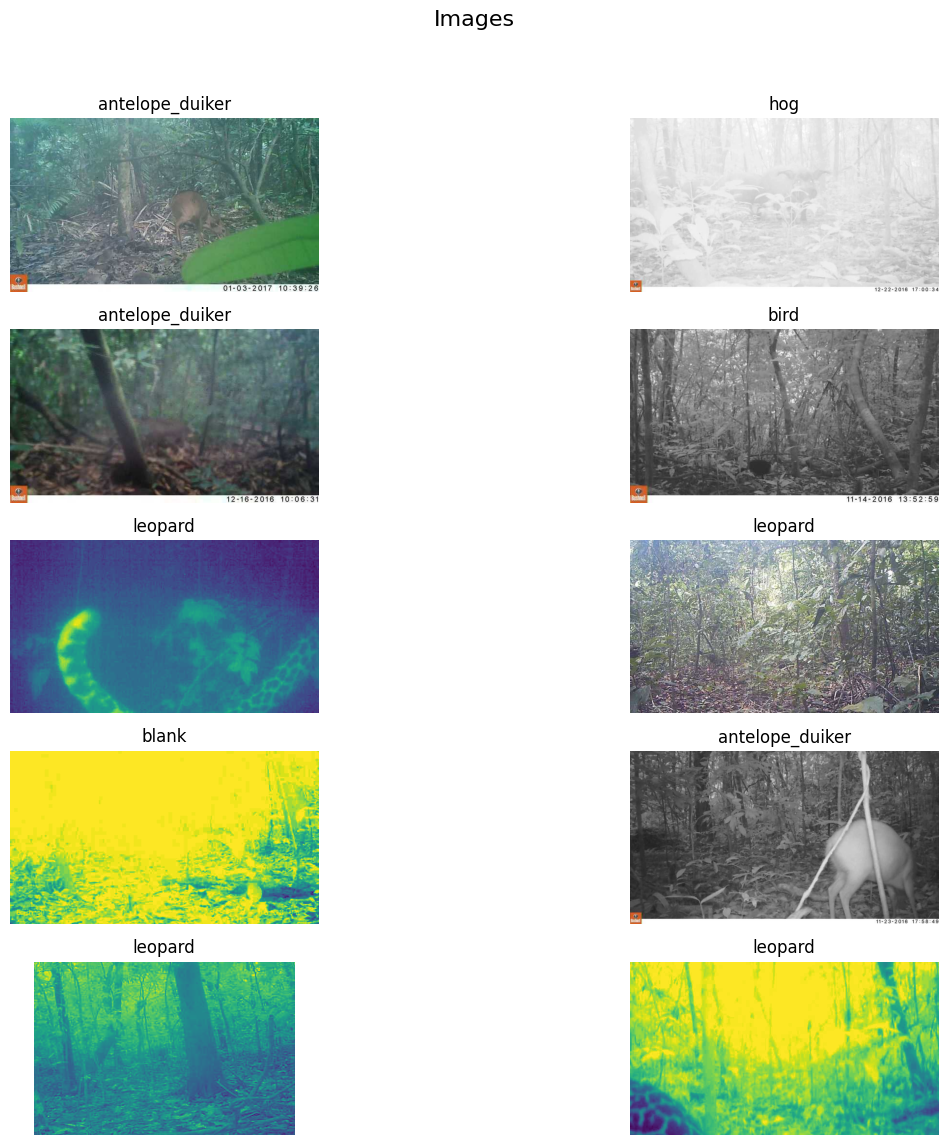

In [93]:
plot_random_img(df = train_df,
                filepaths_column = 'filepath',
                n_images = 10,
                images_dir = master_dir,
                labels_column = 'label')

### Test Images

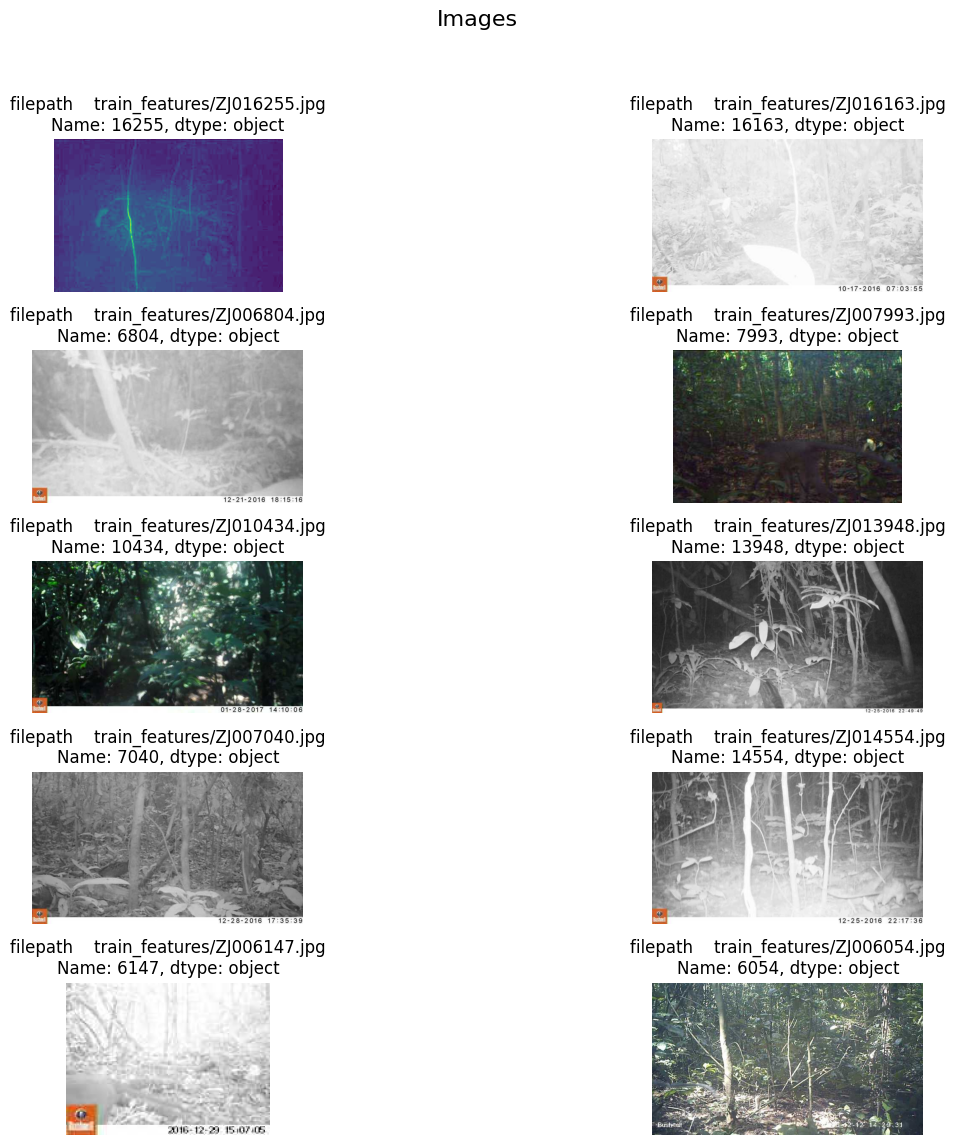

In [94]:
plot_random_img(df = test_features,
                filepaths_column = 'filepath',
                n_images = 10,
                images_dir = master_dir)

## Lables

### train_labels

In [95]:
classes = sorted(train_labels.columns[1:].tolist())
classes

['antelope_duiker',
 'bird',
 'blank',
 'civet_genet',
 'hog',
 'leopard',
 'monkey_prosimian',
 'rodent']

In [96]:
train_labels.shape

(16488, 9)

In [97]:
train_labels.head()

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
train_labels.isna().sum()

id                  0
antelope_duiker     0
bird                0
blank               0
civet_genet         0
hog                 0
leopard             0
monkey_prosimian    0
rodent              0
dtype: int64

Let's check if all rows sum up to 1, meaning all rows have exactly 1 class

In [99]:
train_labels.iloc[:,1:].sum(axis = 1).unique()

array([1.])

We have 1 in every row

Distribution of classes

In [100]:
class_dist_df = train_labels.iloc[:,1:].sum(axis = 0).reset_index().rename(columns = {'index':'Class',0:'Count'}).sort_values(by = 'Count', ascending = False)
class_dist_df

,Class,Count
6,monkey_prosimian,2492.0
0,antelope_duiker,2474.0
3,civet_genet,2423.0
5,leopard,2254.0
2,blank,2213.0
7,rodent,2013.0
1,bird,1641.0
4,hog,978.0


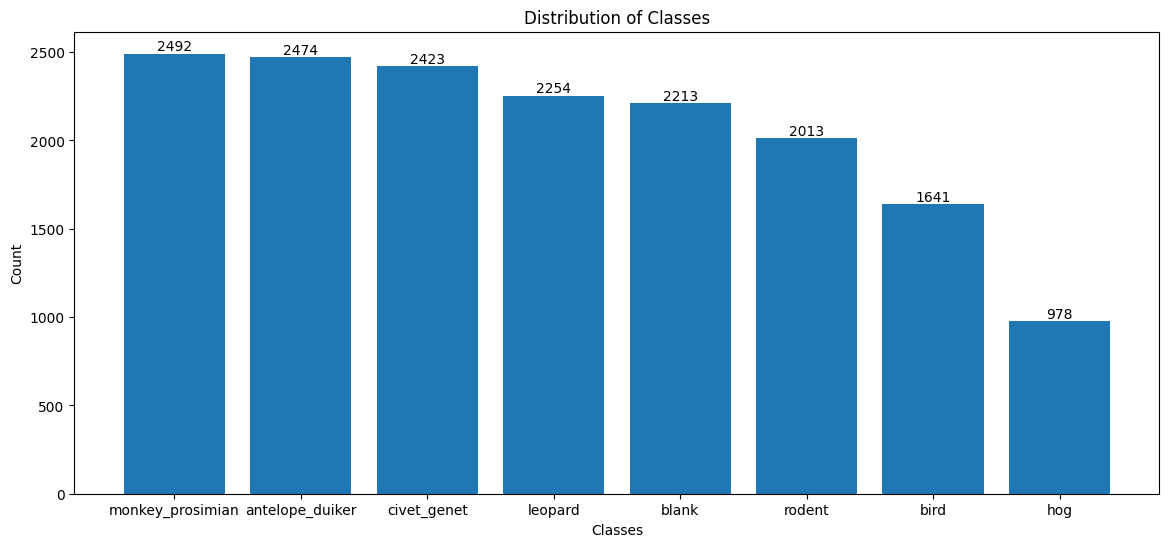

In [101]:
plt.figure(figsize = (14,6))

bars = plt.bar(class_dist_df['Class'], class_dist_df['Count'])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.show()

### test_features

In [102]:
test_features.shape

(4464, 3)

In [103]:
test_features.head()

,id,filepath,site
0,ZJ016488,test_features/ZJ016488.jpg,S0082
1,ZJ016489,test_features/ZJ016489.jpg,S0040
2,ZJ016490,test_features/ZJ016490.jpg,S0040
3,ZJ016491,test_features/ZJ016491.jpg,S0041
4,ZJ016492,test_features/ZJ016492.jpg,S0040


In [104]:
test_features.isna().sum()

id          0
filepath    0
site        0
dtype: int64

# ResNet 1% Data Model

## Train-Test Split

In [105]:
train_labels.set_index('id', inplace = True)
train_features.set_index('id', inplace = True)
test_features.set_index('id', inplace = True)

In [106]:
from sklearn.model_selection import train_test_split

frac = 0.01

y = train_labels.sample(frac=frac, random_state=1)
x = train_features.loc[y.index].filepath.to_frame()

# note that we are casting the species labels to an indicator/dummy matrix
x_train, x_eval, y_train, y_eval = train_test_split(
    x, y, stratify=y, test_size=0.25
)

In [107]:
x_train.head()

,filepath
id,
ZJ013942,train_features/ZJ013942.jpg
ZJ012673,train_features/ZJ012673.jpg
ZJ001956,train_features/ZJ001956.jpg
ZJ001070,train_features/ZJ001070.jpg
ZJ007976,train_features/ZJ007976.jpg


In [108]:
x_eval.head()

,filepath
id,
ZJ004468,train_features/ZJ004468.jpg
ZJ011570,train_features/ZJ011570.jpg
ZJ013585,train_features/ZJ013585.jpg
ZJ002524,train_features/ZJ002524.jpg
ZJ015012,train_features/ZJ015012.jpg


In [109]:
y_train.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ013942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ZJ012673,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ001956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ001070,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ZJ007976,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [110]:
y_eval.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ004468,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ011570,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ZJ013585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ZJ002524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZJ015012,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
x_train.shape, y_train.shape, x_eval.shape, y_eval.shape

((123, 1), (123, 8), (42, 1), (42, 8))

In [112]:
split_pcts = pd.DataFrame(
    {
        "train": y_train.idxmax(axis=1).value_counts(normalize=True),
        "eval": y_eval.idxmax(axis=1).value_counts(normalize=True),
    }
)
print("Species percentages by split")
(split_pcts.fillna(0) * 100).astype(int)

Species percentages by split


,train,eval
antelope_duiker,13,14
bird,10,9
blank,11,11
civet_genet,11,11
hog,5,4
leopard,14,14
monkey_prosimian,18,19
rodent,14,14


## Data Loader

I need to change filepath to be set from Root not just pwd, due to Ray hyperparameter tuning

In [113]:
x_train['filepath'] = x_train['filepath'].apply(lambda x: '/content/drive/MyDrive/driven-data-animals-classification/competition_VfIpjyh/' + x)

In [114]:
x_train

,filepath
id,
ZJ013942,/content/drive/MyDrive/driven-data-animals-cla...
ZJ012673,/content/drive/MyDrive/driven-data-animals-cla...
ZJ001956,/content/drive/MyDrive/driven-data-animals-cla...
ZJ001070,/content/drive/MyDrive/driven-data-animals-cla...
ZJ007976,/content/drive/MyDrive/driven-data-animals-cla...
...,...
ZJ011455,/content/drive/MyDrive/driven-data-animals-cla...
ZJ003689,/content/drive/MyDrive/driven-data-animals-cla...
ZJ004235,/content/drive/MyDrive/driven-data-animals-cla...


In [115]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms


class ImagesDataset(Dataset):
    """Reads in an image, transforms pixel values, and serves
    a dictionary containing the image id, image tensors, and label.
    """

    def __init__(self, x_df, y_df=None):
        self.data = x_df
        self.label = y_df
        self.transform = transforms.Compose(
            [
                transforms.Resize((224, 224)),
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(10),
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
                transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
                )
            ]
        )

    def __getitem__(self, index):
        image = Image.open(self.data.iloc[index]["filepath"]).convert("RGB")
        image = self.transform(image)
        image_id = self.data.index[index]
        # if we don't have labels (e.g. for test set) just return the image and image id
        if self.label is None:
            sample = {"image_id": image_id, "image": image}
        else:
            label = torch.tensor(self.label.iloc[index].values,
                                 dtype=torch.float)
            sample = {"image_id": image_id, "image": image, "label": label}

        return sample

    def __len__(self):
        return len(self.data)




from torch.utils.data import DataLoader

train_dataset = ImagesDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32)

## Model

In [116]:
pip install ray

In [117]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from ray.train import Checkpoint, session
from torch.cuda.amp import autocast, GradScaler
# Define your model class
class CustomResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNetModel, self).__init__()
        self.model = models.resnet50(pretrained=True)
        self.model.fc = nn.Sequential(
                            nn.Linear(2048, 1024),  # dense layer takes a 2048-dim input and outputs 100-dim
                            nn.BatchNorm1d(1024),
                            nn.ReLU(inplace=True),  # ReLU activation introduces non-linearity
                            nn.Dropout(0.25),  # common technique to mitigate overfitting

                            nn.Linear(1024,512),
                            nn.BatchNorm1d(512),
                            nn.ReLU(inplace=True),  # ReLU activation introduces non-linearity
                            nn.Dropout(0.25),  # common technique to mitigate overfitting

                            nn.Linear(512,256),
                            nn.BatchNorm1d(256),
                            nn.ReLU(inplace=True),  # ReLU activation introduces non-linearity
                            nn.Dropout(0.25),  # common technique to mitigate overfitting

                            nn.Flatten(),
                            nn.ReLU(inplace=True),
                            nn.Linear(
                                256, 8
                            ),
                        )

    def forward(self, x):
        return self.model(x)

# Define a function for training
def train_model(config, train_loader, num_epochs, tracking_loss):
    model = CustomResNetModel(num_classes=config["num_classes"])
    optimizer = optim.Adam(model.parameters(), lr=config["lr"])
    criterion = nn.CrossEntropyLoss()

    tracking_loss = {}  # Dictionary to track loss

    for epoch in range(num_epochs):
        print(f"Starting epoch {epoch}")

        # Iterate through the dataloader batches. tqdm keeps track of progress.
        for batch_n, batch in enumerate(tqdm(train_loader)):
            # 1) Zero out the parameter gradients so that gradients from previous batches are not used in this step
            optimizer.zero_grad()

            # 2) Run the forward step on this batch of images
            outputs = model(batch["image"])

            # 3) Compute the loss
            loss = criterion(outputs, batch["image"])
            print(loss)
            # Let's keep track of the loss by epoch and batch
            tracking_loss[(epoch, batch_n)] = float(loss.item())  # Corrected to use item() to get the loss as a float

            # 4) Compute gradients
            loss.backward()
            # Update the model's weights
            optimizer.step()


    return tracking_loss, model  # Return the tracking_loss dictionary and model

# Define a Ray Tune trainable function
def trainable(config):
    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True, num_workers=4)
    tracking_loss, _ = train_model(config, train_loader, config["num_epochs"], {})  # Pass an empty dictionary for tracking_loss

    return {"loss": min(tracking_loss.values())}


## Hyperparameters Tuning

In [118]:
!pip install ray

I am going to tune model on 2 hypeparameters learning rate and batch size

In [119]:
# # Define a scheduler (optional)
# scheduler = ASHAScheduler(
#     metric="loss",  # Replace with your actual metric
#     mode="min",  # Replace with "min" if you are minimizing the metric
#     max_t=100,
#     grace_period=1
# )

# # Set up Ray
# ray.shutdown()
# ray.init()

# # Define the hyperparameter search space
# config = {
#     "lr": tune.loguniform(1e-3, 1e-1),
#     "num_epochs": tune.choice([1,5,10]),
#     "batch_size": tune.choice([16, 32, 64]),
#     "num_classes": 8,  # Modify according to your task
# }

# # Start the hyperparameter search
# analysis = tune.run(
#     trainable,
#     config=config,
#     num_samples=10,  # Adjust the number of samples as needed
#     scheduler=scheduler,  # Use the scheduler if desired
#     fail_fast="raise",
# )

We achieved best hyperparameters on 1% of data which are as below

In [120]:
# best_hyperparameters = analysis.get_best_config(metric="loss", mode="min")
# print("Best Hyperparameters:", best_hyperparameters)

# ResNet 100% Data Model

## Model

In [121]:
# import torch
# import torch.optim as optim
# import torch.nn as nn
# import torchvision.models as models
# from torch.utils.data import Dataset, DataLoader
# import ray
# from ray import tune
# from ray.tune.schedulers import ASHAScheduler
# from ray.train import Checkpoint, session
# from torch.cuda.amp import autocast, GradScaler
# from torch.optim.lr_scheduler import StepLR
# # Define your model class
# class CustomResNetModel(nn.Module):
#     def __init__(self, num_classes):
#         super(CustomResNetModel, self).__init__()
#         self.model = models.resnet50(pretrained=True)
#         self.model.fc = nn.Sequential(
#                             nn.Linear(2048, 1024),  # dense layer takes a 2048-dim input and outputs 100-dim
#                             nn.BatchNorm1d(1024),
#                             nn.ReLU(inplace=True),  # ReLU activation introduces non-linearity
#                             nn.Dropout(0.25),  # common technique to mitigate overfitting

#                             nn.Linear(1024,512),
#                             nn.BatchNorm1d(512),
#                             nn.ReLU(inplace=True),  # ReLU activation introduces non-linearity
#                             nn.Dropout(0.25),  # common technique to mitigate overfitting

#                             nn.Flatten(),
#                             nn.ReLU(inplace=True),
#                             nn.Linear(
#                                 512, 8
#                             ),
#                         )

#     def forward(self, x):
#         return self.model(x)

# # Define a function for training
# def train_model(config, train_loader, starting_epoch, num_epochs):
#     model = CustomResNetModel(num_classes=config["num_classes"])
#     optimizer = optim.Adam(model.parameters(), lr=config["lr"])
#     criterion = nn.CrossEntropyLoss()
#     device = torch.device("cuda" if torch.cuda.is_available() else "gpu")
#     model = model.to(device)

#     tracking_loss = {'train': {}, 'val': {}, 'test': {}}

#     checkpoint_dir = "/content/drive/MyDrive/driven-data-animals-classification/competition_VfIpjyh/checkpoints/"
#     if not os.path.exists(checkpoint_dir):
#         os.makedirs(checkpoint_dir)


#     if starting_epoch > 0:

#       # checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{starting_epoch}.pth")
#       # checkpoint = torch.load(checkpoint_path)
#       # model.load_state_dict(checkpoint["model_state_dict"])
#       optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
#       scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
#       start_epoch = checkpoint["epoch"]

#     else:
#       model = CustomResNetModel(num_classes=config["num_classes"])
#       optimizer = optim.Adam(model.parameters(), lr=config["lr"])
#       scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
#       tracking_loss = {}

#     for epoch in range(num_epochs):
#         print(f"Starting epoch {epoch}")

#         for batch_n, batch in enumerate(tqdm(train_loader)):
#             optimizer.zero_grad()
#             outputs = model(batch["image"])
#             loss = criterion(outputs, batch["label"])
#             tracking_loss[(epoch, batch_n)] = float(loss.item())
#             loss.backward()
#             optimizer.step()
#             scheduler.step()
#             checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch}.pth")
#             checkpoint = {
#                     "epoch": epoch,
#                     "model_state_dict": model.state_dict(),
#                     "optimizer_state_dict": optimizer.state_dict(),
#                     "loss": loss.item()
#                 }
#             torch.save(checkpoint, checkpoint_path)

#             if batch_n % 10 == 0:
#               print(f"Epoch {epoch}, Batch {batch_n}, Loss: {loss.item()}")

#     return tracking_loss, model

# def trainable(config):
#     train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True, num_workers=4)
#     tracking_loss, _ = train_model(config, train_loader, config["num_epochs"], {})

#     return {"loss": min(tracking_loss.values())}


In [122]:
pip install efficientnet_pytorch

In [123]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from ray.train import Checkpoint, session
from torch.cuda.amp import autocast, GradScaler
from torch.optim.lr_scheduler import StepLR
import json  # Add this line

from efficientnet_pytorch import EfficientNet

class CustomEfficientNetModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomEfficientNetModel, self).__init__()

        # Load pre-trained EfficientNet model
        self.model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=1000)

        # Modify the final fully connected layer for the desired output classes
        self.model._fc = nn.Sequential(
            nn.Linear(1280, 1024),  # Adjust input size based on the specific EfficientNet variant
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=False),
            nn.Dropout(0.20),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=False),
            nn.Dropout(0.25),

            nn.Flatten(),
            nn.ReLU(inplace=False),
            nn.Linear(512, 8)
        )

    def forward(self, x):
        return self.model(x)

# Define a function for training
def train_model(config, train_loader, test_loader, val_loader, starting_epoch, num_epochs, patience):
    torch.autograd.set_detect_anomaly(True)

    model = CustomEfficientNetModel(num_classes=config["num_classes"])
    optimizer = optim.Adam(model.parameters(), lr=config["lr"])
    criterion = nn.CrossEntropyLoss()
    # device = torch.device("cuda" if torch.cuda.is_available() else "gpu")
    # model = model.to(device)

    tracking_loss = {'train': [], 'val': [], 'test': []}

    checkpoint_dir = "/content/drive/MyDrive/driven-data-animals-classification/competition_VfIpjyh/checkpoints/"
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)


    if starting_epoch > 1:
      checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{starting_epoch-1}.pth")
      checkpoint = torch.load(checkpoint_path)
      model.load_state_dict(checkpoint["model_state_dict"])
      optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
      scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
      start_epoch = checkpoint["epoch"]

      # Load tracking_loss dictionary from disk
      losses_filename = os.path.join(checkpoint_dir, f"tracking_loss_epoch_{starting_epoch-1}.json")
      with open(losses_filename, 'r') as json_file:
          tracking_loss = json.load(json_file)

    else:
      model = CustomEfficientNetModel(num_classes=config["num_classes"])
      optimizer = optim.Adam(model.parameters(), lr=config["lr"])
      scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

    for epoch in range(starting_epoch, num_epochs + 1):
        print(f"Starting epoch {epoch}")

        for phase in ['train', 'val', 'test']:
            data_loader = train_loader if phase == 'train' else (val_loader if phase == 'val' else test_loader)
            model.train() if phase == 'train' else model.eval()

            for batch_n, batch in enumerate(tqdm(data_loader)):  # Use data_loader here instead of train_loader
                optimizer.zero_grad()

                outputs = model(batch["image"])
                loss = criterion(outputs, batch["label"])

                # Add regularization term to the loss
                l2_reg = torch.tensor(0.)
                for param in model.parameters():
                    l2_reg += torch.norm(param)

                # Ensure l2_reg does not require gradients
                l2_reg = l2_reg.detach()

                loss += config["weight_decay"] * l2_reg

                loss.backward()
                optimizer.step()
                checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch}.pth")
                checkpoint = {
                    "epoch": epoch,
                    "model_state_dict": model.state_dict(),
                    "optimizer_state_dict": optimizer.state_dict(),
                    "loss": loss.item()
                }
                torch.save(checkpoint, checkpoint_path)

                if phase == 'train':
                    scheduler.step()

                if batch_n % 10 == 0:
                    print(f"Epoch {epoch}, Phase {phase}, Batch {batch_n}, Loss: {loss.item()}")

            # After the epoch, append the epoch_loss to the tracking_loss dictionary
            tracking_loss[phase].append(float(loss.item()))

        # Save the checkpoint after each epoch
        checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch}.pth")
        checkpoint = {
            "epoch": epoch,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "loss": loss.item()
        }
        torch.save(checkpoint, checkpoint_path)

        best_val_loss = max(tracking_loss['val'])
        consecutive_no_improve = 0  # Initialize the variable here

        # Check if the validation loss has improved
        val_loss = tracking_loss['val'][-1]
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            consecutive_no_improve = 0
        else:
            consecutive_no_improve += 1

        # If no improvement for patience consecutive epochs, early stop
        if consecutive_no_improve == patience:
            print(f"Stopping early as no improvement for {patience} consecutive epochs.")
            break


        # Save the tracking_loss dictionary to disk after each epoch
        losses_filename = os.path.join(checkpoint_dir, f"tracking_loss_epoch_{epoch}.json")
        with open(losses_filename, 'w') as json_file:
            json.dump(tracking_loss, json_file)


    # print(f"Epoch {epoch}, Training Loss: {tracking_loss['train'][-1]}, Validation Loss: {tracking_loss['val'][-1]}")

    return tracking_loss, model


def trainable(config):
    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False, num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=config["batch_size"], shuffle=False, num_workers=4)

    tracking_loss, _ = train_model(config, train_loader, val_loader, test_loader, config["num_epochs"], {})

    return {"loss": min(tracking_loss['val'].values())}  # You may want to choose another metric for tuning


## Train-Test Split

In [124]:
from sklearn.model_selection import train_test_split

frac = 1

# Assuming train_labels and train_features are your original dataframes
y = train_labels.sample(frac=frac, random_state=1)
x = train_features.loc[y.index].filepath.to_frame()

# Splitting into train and temp sets
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, stratify=y, test_size=0.25, random_state=42
)

# Further splitting temp set into eval and val sets
x_test, x_val, y_test, y_val = train_test_split(
    x_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=42
)

# Now you have x_train, x_eval, x_val, y_train, y_eval, y_val

In [125]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((12366, 1), (12366, 8), (2061, 1), (2061, 8), (2061, 1), (2061, 8))

In [126]:
split_pcts = pd.DataFrame(
    {
        "train": y_train.idxmax(axis=1).value_counts(normalize=True),
        "test": y_test.idxmax(axis=1).value_counts(normalize=True),
        "val": y_val.idxmax(axis=1).value_counts(normalize=True),
    }
)
print("Species percentages by split")
(split_pcts.fillna(0) * 100).astype(int)

Species percentages by split


,train,test,val
monkey_prosimian,15,15,15
antelope_duiker,15,15,14
civet_genet,14,14,14
leopard,13,13,13
blank,13,13,13
rodent,12,12,12
bird,9,9,9
hog,5,5,5


## Data Loader

In [127]:
best_hyperparameters = {'lr':0.001, 'num_classes':8, 'num_epochs': 10, 'batch_size':32, 'weight_decay': 1e-5, 'patience': 3}

In [128]:
train_dataset = ImagesDataset(x_train, y_train)
val_dataset = ImagesDataset(x_val, y_val)
test_dataset = ImagesDataset(x_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size = best_hyperparameters['batch_size'], shuffle=True, num_workers=8)
val_dataloader = DataLoader(val_dataset, batch_size=best_hyperparameters['batch_size'], shuffle=False, num_workers=8)
test_dataloader = DataLoader(test_dataset, batch_size=best_hyperparameters['batch_size'], shuffle=False, num_workers=8)

## Train

Train on best hyperparameters and 10 epochs

In [ ]:
# Train the model with the best hyperparameters
losses, best_model = train_model(best_hyperparameters, train_dataloader, val_dataloader, test_dataloader, starting_epoch = 10, num_epochs = best_hyperparameters['num_epochs'], patience = best_hyperparameters['patience'])

Loaded pretrained weights for efficientnet-b0
Starting epoch 10


  0%|          | 1/387 [00:09<59:55,  9.31s/it]

Epoch 10, Phase train, Batch 0, Loss: 1.418825626373291


  3%|▎         | 11/387 [00:58<31:06,  4.96s/it]

Epoch 10, Phase train, Batch 10, Loss: 1.8218154907226562


  5%|▌         | 21/387 [01:47<30:06,  4.94s/it]

Epoch 10, Phase train, Batch 20, Loss: 1.6458388566970825


  8%|▊         | 31/387 [02:35<29:18,  4.94s/it]

Epoch 10, Phase train, Batch 30, Loss: 1.6539833545684814


 11%|█         | 41/387 [03:25<28:19,  4.91s/it]

Epoch 10, Phase train, Batch 40, Loss: 1.871938943862915


 13%|█▎        | 51/387 [04:13<26:58,  4.82s/it]

Epoch 10, Phase train, Batch 50, Loss: 1.5804917812347412


 16%|█▌        | 61/387 [05:03<26:31,  4.88s/it]

Epoch 10, Phase train, Batch 60, Loss: 1.6336922645568848


 18%|█▊        | 71/387 [05:52<25:34,  4.86s/it]

Epoch 10, Phase train, Batch 70, Loss: 1.4664655923843384


 21%|██        | 81/387 [06:42<24:45,  4.86s/it]

Epoch 10, Phase train, Batch 80, Loss: 1.728674292564392


 24%|██▎       | 91/387 [07:31<23:39,  4.79s/it]

Epoch 10, Phase train, Batch 90, Loss: 1.7606467008590698


 26%|██▌       | 101/387 [08:22<24:12,  5.08s/it]

Epoch 10, Phase train, Batch 100, Loss: 1.5697697401046753


 29%|██▊       | 111/387 [09:11<23:11,  5.04s/it]

Epoch 10, Phase train, Batch 110, Loss: 1.927873969078064


 31%|███▏      | 121/387 [10:01<22:09,  5.00s/it]

Epoch 10, Phase train, Batch 120, Loss: 1.782528042793274


 34%|███▍      | 131/387 [10:50<20:47,  4.87s/it]

Epoch 10, Phase train, Batch 130, Loss: 2.0013837814331055


 36%|███▋      | 141/387 [11:39<19:50,  4.84s/it]

Epoch 10, Phase train, Batch 140, Loss: 1.6397043466567993


 39%|███▉      | 151/387 [12:28<18:58,  4.83s/it]

Epoch 10, Phase train, Batch 150, Loss: 1.6188671588897705


 42%|████▏     | 161/387 [13:17<18:04,  4.80s/it]

Epoch 10, Phase train, Batch 160, Loss: 1.3254754543304443


 44%|████▍     | 171/387 [14:07<17:12,  4.78s/it]

Epoch 10, Phase train, Batch 170, Loss: 1.7361451387405396


 47%|████▋     | 181/387 [14:57<17:03,  4.97s/it]

Epoch 10, Phase train, Batch 180, Loss: 1.7032390832901


 49%|████▉     | 191/387 [15:46<16:23,  5.02s/it]

Epoch 10, Phase train, Batch 190, Loss: 1.762494683265686


 52%|█████▏    | 201/387 [16:35<15:25,  4.98s/it]

Epoch 10, Phase train, Batch 200, Loss: 1.6317371129989624


 55%|█████▍    | 211/387 [17:24<14:42,  5.01s/it]

Epoch 10, Phase train, Batch 210, Loss: 1.7647830247879028


 57%|█████▋    | 221/387 [18:11<13:34,  4.91s/it]

Epoch 10, Phase train, Batch 220, Loss: 1.7400230169296265


 60%|█████▉    | 231/387 [19:00<13:10,  5.07s/it]

Epoch 10, Phase train, Batch 230, Loss: 1.5412753820419312


 62%|██████▏   | 241/387 [19:49<12:01,  4.94s/it]

Epoch 10, Phase train, Batch 240, Loss: 1.5864547491073608


 65%|██████▍   | 251/387 [20:37<11:07,  4.91s/it]

Epoch 10, Phase train, Batch 250, Loss: 1.8468338251113892


 67%|██████▋   | 261/387 [21:25<10:15,  4.89s/it]

Epoch 10, Phase train, Batch 260, Loss: 1.6866278648376465


 70%|███████   | 271/387 [22:13<09:22,  4.85s/it]

Epoch 10, Phase train, Batch 270, Loss: 1.719104528427124


 73%|███████▎  | 281/387 [23:01<08:31,  4.82s/it]

Epoch 10, Phase train, Batch 280, Loss: 1.6910918951034546


 75%|███████▌  | 291/387 [23:50<07:43,  4.83s/it]

Epoch 10, Phase train, Batch 290, Loss: 1.845747470855713


 78%|███████▊  | 301/387 [24:38<06:55,  4.83s/it]

Epoch 10, Phase train, Batch 300, Loss: 1.6521106958389282


 80%|████████  | 311/387 [25:27<06:09,  4.86s/it]

Epoch 10, Phase train, Batch 310, Loss: 1.9447005987167358


 83%|████████▎ | 321/387 [26:16<05:17,  4.80s/it]

Epoch 10, Phase train, Batch 320, Loss: 1.456122636795044


 86%|████████▌ | 331/387 [27:05<04:27,  4.78s/it]

Epoch 10, Phase train, Batch 330, Loss: 1.6311596632003784


 88%|████████▊ | 341/387 [27:55<03:43,  4.86s/it]

Epoch 10, Phase train, Batch 340, Loss: 1.6086597442626953


 91%|█████████ | 351/387 [28:45<03:05,  5.15s/it]

Epoch 10, Phase train, Batch 350, Loss: 1.6036441326141357


 93%|█████████▎| 361/387 [29:34<02:10,  5.02s/it]

Epoch 10, Phase train, Batch 360, Loss: 1.8087306022644043


 96%|█████████▌| 371/387 [30:23<01:18,  4.93s/it]

Epoch 10, Phase train, Batch 370, Loss: 1.8059102296829224


 98%|█████████▊| 381/387 [31:11<00:29,  4.85s/it]

Epoch 10, Phase train, Batch 380, Loss: 1.549106478691101


  2%|▏         | 1/65 [00:07<08:22,  7.85s/it]

Epoch 10, Phase val, Batch 0, Loss: 1.7857452630996704


 17%|█▋        | 11/65 [00:55<04:17,  4.77s/it]

Epoch 10, Phase val, Batch 10, Loss: 1.5978933572769165


 32%|███▏      | 21/65 [01:42<03:29,  4.77s/it]

Epoch 10, Phase val, Batch 20, Loss: 1.5834506750106812


 48%|████▊     | 31/65 [02:29<02:40,  4.72s/it]

Epoch 10, Phase val, Batch 30, Loss: 1.558107614517212


 63%|██████▎   | 41/65 [03:17<01:57,  4.89s/it]

Epoch 10, Phase val, Batch 40, Loss: 1.5259991884231567


 78%|███████▊  | 51/65 [04:04<01:06,  4.77s/it]

Epoch 10, Phase val, Batch 50, Loss: 1.660239338874817


 94%|█████████▍| 61/65 [04:52<00:19,  4.78s/it]

Epoch 10, Phase val, Batch 60, Loss: 1.7034714221954346


  2%|▏         | 1/65 [00:07<08:24,  7.88s/it]

Epoch 10, Phase test, Batch 0, Loss: 2.0287060737609863


 17%|█▋        | 11/65 [00:54<04:04,  4.52s/it]

Epoch 10, Phase test, Batch 10, Loss: 1.7386460304260254


 32%|███▏      | 21/65 [01:40<03:18,  4.51s/it]

Epoch 10, Phase test, Batch 20, Loss: 1.6404708623886108


 48%|████▊     | 31/65 [02:27<02:36,  4.60s/it]

Epoch 10, Phase test, Batch 30, Loss: 1.4785715341567993


 63%|██████▎   | 41/65 [03:14<01:49,  4.55s/it]

Epoch 10, Phase test, Batch 40, Loss: 1.6546770334243774


 78%|███████▊  | 51/65 [03:59<01:03,  4.55s/it]

Epoch 10, Phase test, Batch 50, Loss: 1.4669122695922852


 91%|█████████ | 59/65 [04:36<00:27,  4.54s/it]

In [ ]:
losses

In [ ]:
best_model

## Save Model

In [ ]:
import datetime

time = datetime.datetime.now().strftime('%d-%m-%Y_%H-%M')

torch.save(best_model, f"best_model_{time}.pth")

## Plot Loss

In [ ]:
# Convert the tracking_loss dictionary to a Pandas DataFrame
tracking_loss_df = pd.DataFrame(losses)

# Create a figure for the plot
plt.figure(figsize=(15, 8))

# Set the colors for train, val, and test
colors = {'train': 'blue', 'val': 'green', 'test': 'red'}

# Plot the losses
for phase in ['train', 'val', 'test']:
    tracking_loss_df[phase].plot(label=f"{phase} loss", alpha=0.8, color=colors[phase])

    # Plot the moving average
    tracking_loss_df[phase].rolling(center=True, min_periods=1, window=10).mean().plot(
        label=f"{phase} loss (moving avg)", linestyle='dashed', alpha=0.8, color=colors[phase]
    )

# Set labels and legend
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')

# Show the plot
plt.show()


## Load Model

In [ ]:
loaded_model = torch.load(f"best_model_{time}.pth")

In [ ]:
eval_dataset = ImagesDataset(x_eval, y_eval)
eval_dataloader = DataLoader(eval_dataset, batch_size=32)

## Predict

In [ ]:
preds_collector = []

# put the model in eval mode so we don't update any parameters
loaded_model.eval()

# we aren't updating our weights so no need to calculate gradients
with torch.no_grad():
    for batch in tqdm(eval_dataloader, total=len(eval_dataloader)):
        # 1) run the forward step
        logits = loaded_model.forward(batch["image"])
        # 2) apply softmax so that model outputs are in range [0,1]
        preds = nn.functional.softmax(logits, dim=1)
        # 3) store this batch's predictions in df
        # note that PyTorch Tensors need to first be detached from their computational graph before converting to numpy arrays
        preds_df = pd.DataFrame(
            preds.detach().numpy(),
            index=batch["image_id"],
            columns=classes,
        )
        preds_collector.append(preds_df)

eval_preds_df = pd.concat(preds_collector)
eval_preds_df

## Pred Labels Dist

In [ ]:
print("True labels (training):")
y_train.idxmax(axis=1).value_counts()

In [ ]:
plt.hist(y_train.idxmax(axis=1).value_counts())

In [ ]:
print("Predicted labels (eval):")
eval_preds_df.idxmax(axis=1).value_counts()

In [ ]:
plt.hist(eval_preds_df.idxmax(axis=1).value_counts())

In [ ]:
print("True labels (eval):")
y_eval.idxmax(axis=1).value_counts()

In [ ]:
plt.hist(y_eval.idxmax(axis=1).value_counts())

## Accuracy

In [ ]:
eval_predictions = eval_preds_df.idxmax(axis=1)
eval_predictions.head()

In [ ]:
eval_true = y_eval.idxmax(axis=1)

(eval_true == "monkey_prosimian").sum() / len(eval_predictions)

In [ ]:
correct = (eval_predictions == eval_true).sum()
accuracy = correct / len(eval_predictions)
accuracy

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = ConfusionMatrixDisplay.from_predictions(
    y_eval.idxmax(axis=1),
    eval_preds_df.idxmax(axis=1),
    ax=ax,
    xticks_rotation=90,
    colorbar=True,
)

# Submission

In [ ]:
test_dataset = ImagesDataset(test_features.filepath.to_frame())
test_dataloader = DataLoader(test_dataset, batch_size=best_hyperparameters['batch_size'])

In [73]:
preds_collector = []

# put the model in eval mode so we don't update any parameters
loaded_model.eval()

# we aren't updating our weights so no need to calculate gradients
with torch.no_grad():
    for batch in tqdm(test_dataloader, total=len(test_dataloader)):
        # run the forward step
        logits = loaded_model.forward(batch["image"])
        # apply softmax so that model outputs are in range [0,1]
        preds = nn.functional.softmax(logits, dim=1)
        # store this batch's predictions in df
        # note that PyTorch Tensors need to first be detached from their computational graph before converting to numpy arrays
        preds_df = pd.DataFrame(
            preds.detach().numpy(),
            index=batch["image_id"],
            columns=classes,
        )
        preds_collector.append(preds_df)

submission_df = pd.concat(preds_collector)
submission_df

100%|██████████| 140/140 [19:02<00:00,  8.16s/it]


,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
ZJ016488,0.057841,0.005368,0.085272,0.667923,0.012537,0.104289,0.007516,0.059254
ZJ016489,0.195130,0.197638,0.113881,0.018334,0.044507,0.126258,0.181858,0.122394
ZJ016490,0.266754,0.100464,0.121130,0.097596,0.118093,0.113526,0.114601,0.067835
ZJ016491,0.052776,0.019265,0.051451,0.038569,0.018818,0.732627,0.033256,0.053237
ZJ016492,0.193202,0.202222,0.122098,0.030986,0.046315,0.110342,0.148838,0.145996
...,...,...,...,...,...,...,...,...
ZJ020947,0.164952,0.113588,0.123861,0.010724,0.044329,0.110598,0.376464,0.055485
ZJ020948,0.274929,0.131464,0.070020,0.028087,0.042066,0.062163,0.343623,0.047648
ZJ020949,0.064284,0.019165,0.095289,0.083264,0.230031,0.417276,0.045076,0.045614
ZJ020950,0.099568,0.070841,0.219656,0.038861,0.052871,0.345901,0.068981,0.103320


In [74]:
submission_format = pd.read_csv("submission_format.csv", index_col="id")

assert all(submission_df.index == submission_format.index)
assert all(submission_df.columns == submission_format.columns)

In [75]:
submission_df.to_csv(f"submission_df_{time}.csv")